In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import seaborn as sns

In [79]:
import matplotlib.pyplot as plt

In [80]:
dataset = pd.read_csv('data (1).csv')
X = dataset.values

# Measure of central tendency:


The central value of a dataset which describes the dataset to some extent is called a measure of cental tendency.The are the three measures of central tendency are **mean, median** and **mode**.

## Mean

This is the average value of the dataset. This is used when there are no outliers in the dataset.\
*Mean* = $ \frac{\Sigma^n_{i=1} X_i}{n} $

## Median

This data point which is at the middle of the sorted dataset. If the dataset has even number of points, we take the mean of the two mid data points as the median. This is preferred over the mean when outliers are present as it is robust to outliers. In datasets with no outliers mean is preferred. This is because the median has higher time complexity as we need to sort the dataset.

## Mode

The most frequently occuring observation gives us the mode. If there are n observations with the highest occurence, then we get n modes. This is used when the dataset is categorical

In [27]:
#Printing the mean of the Monthly income column
print(dataset['Mthly_HH_Income'].mean()) #41558.0
#Printing the mean of the Monthly expense column
print(dataset['Mthly_HH_Expense'].median()) #15500.0
#Printing the mode of the number of family members column
print(dataset['No_of_Fly_Members'].mode()) #4

41558.0
15500.0
0    4
dtype: int64


In [28]:
#Printing the mean of the Monthly income columnx = np.array(X)
mean = 0
for i in range(50):
    mean = mean + X[i][0]
print(mean/50)

41558.0


In [29]:
#Printing the mean of the Monthly expense column
y = X[:,1]
y.sort()
print(0.5*(y[24] + y[25]))

15500.0


In [30]:
#Printing the mode of the number of family members column
z = X[:,2]
mydict = {}
for i in z:
    if not i in mydict:
        mydict[i] = 1
    else:
        mydict[i] += 1
f = max(mydict.values())
for i,j in mydict.items():
    if j == f:
        print(i)

4


# Measure of spread

These are a measure of similarity or difference of the data points in our dataset. Essentialy they measure how scattered our data is. Two such importants measures of spread are the **Variance** and the **Standard Deviation**.

## Variance and Standard deviation:

Variance($ \sigma^2 $) is the average of squares of deviation of each observation from the mean. Standard deviation($ \sigma $) is the square root of Variance. \
$ \sigma^2 = \frac{\Sigma^n_{i=1} (X_i - \mu)^2}{n} $ where $ \mu $ is the mean of the dataset \
When the population of the dataset, i.e 'n' value is large, we take a sample of the data to estimate the variance. To remove the bias in this sample, we replace 'n' with 'n-1'. The formula hence becomes \
$ \sigma^2 = \frac{\Sigma^n_{i=1} (X_i - \mu)^2}{n-1} $

In [31]:
#Variance and Standard deviation of EMI or rent amount column
print(np.var(X[:,3]))
print((np.var(X[:,3]))**0.5)

38176400.0
6178.705366013175


In [32]:
#Variance and Standard deviation of EMI or rent amount column
def variance(array):
    mean = sum(array)/len(array)
    s = 0
    for i in array:
        s = s + ((i-mean)**2)
    return (s/len(array))
print(variance(X[:,3]))
print((variance(X[:,3]))**0.5)

38176400.0
6178.705366013175


# Correlation
 
 This tells us how(whether) two variables are linearly related. This is measured with the help of a correlation coefficient, the most common of which is the **_Pearson correlation coefficient_ ($ \rho $)** .
 
$ \rho = \frac{cov(x,y)}{\sigma_x * \sigma_y} $ \where cov(x,y) is the covariance of x and y which measure the relationship between x and y. A positive covariance indicates x increases as y increases and a negative covariance while a negative covariance indicates x decreases as y increases or vice-versa.\
cov(x,y) = $ \frac{\sum_{i=0}^n (x - \mu_x)(y - \mu_y)}{n}$ where $ \mu_x $ and $ \mu_y $ are means of x and y respectively  \
$ and \sigma_x and \sigma_y $ are the variances of x and y respetively.


In [33]:
#Correlation between family expense and no of family members
x1 = X[:,1]
x2 = X[:,2]
print(round(sc.pearsonr(x1,x2)[0],3))

0.461


In [42]:
#Correlation between family expense and no of family members
def std(l):
    m = sum(l)/len(l)
    s = 0
    for i in l:
        s = s + (i-m)**2
    s = s/len(l)
    return (s**0.5)
n = 50
X1 = x[:,1]
Y1 = x[:,2]
std_X = std(X1)
std_Y = std(Y1)
mean_X = sum(X1)/n
mean_Y = sum(Y1)/n
Num = 0
for i in range(n):
    Num = Num + ((X1[i] - mean_X)*(Y1[i]-mean_Y))
Dr = n*std_X*std_Y
print(round((Num/Dr),3))

0.461


# Normal distribution

A continuos probability distribution which has the following probability density function(pdf): \
$ {\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}} $ \ (here $ \mu $ and $ \sigma $ are the mean and the standard deviation respectively)
is called a normal distribution.\
This is one of the most common distributions in practice. A schematic is shown below.
<!-- ![Alt Text](image path) -->
![Alt Text](https://spss-tutorials.com/img/normal-distribution-iq-scores-example-2.png)

## Features of a Normal Distribution

1. The curve is symmetric and bell shaped
2. It is symmetric about the mean. Here the mean, mode and median are the same
3. The total area of the curve gives us the total probability which is equal to 1. The area between one standard deviation on either side of the curve is 68% of the total area. This is summarised below:\
P(($ \bar X $ - S) < $ \bar X $ < ($ \bar X $ + S)) = 68.3% \
P(($ \bar X $ - 2S) < $ \bar X $ < ($ \bar X $ + 2S)) = 95.4% \
P(($ \bar X $ - 3S) < $ \bar X $ < ($ \bar X $ + 3S)) = 99.7% where $ \bar X $ is the mean and S is the standard deviation of the sample. This is called the 68-95-99.7 rule.

# Skewness

If the curve isn't symmetrical, i.e slightly deviated towards left or right, it is said to be skewed. If the curve is deviated towards left, it is called left(negatively) skewed distribution and if it is deviated towards right, it is called right(positively) skewed distribution. The same is illustrated below:
<!-- ![Alt Text](image path) -->
![Alt Text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/434px-Relationship_between_mean_and_median_under_different_skewness.png)


As we can see from the above picture, in a postively skewed distribution since more values are added to the right, the mean and the median shift towards right. But the mode doesn't change as the highest frequency value is still the vale corresponding to the peak of the distribution.

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

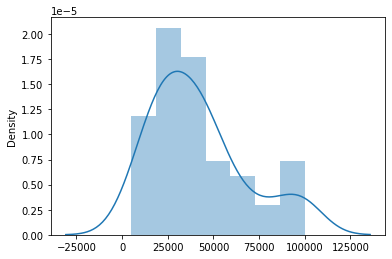

In [73]:
#Monthly income
sns.distplot(X[:,0])

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

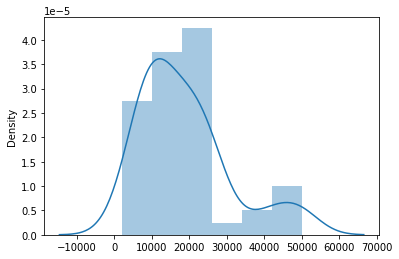

In [74]:
#Montly expenses
sns.distplot(X[:,1])

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

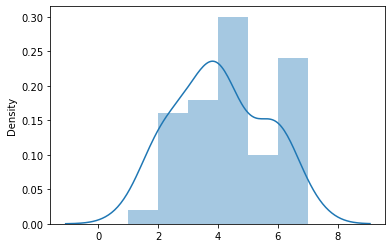

In [76]:
#No of family members
sns.distplot(X[:,2])

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

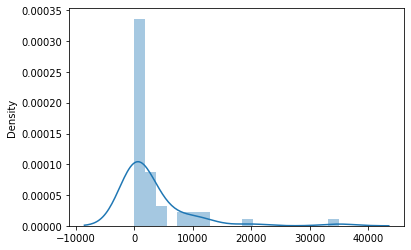

In [75]:
#EMI or Rent expenses
sns.distplot(X[:,3])

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

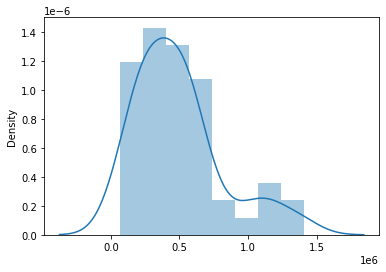

In [77]:
#Annual income
sns.distplot(X[:,4])

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

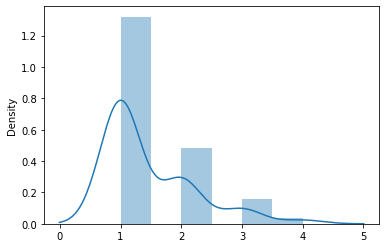

In [78]:
#No of earning members
sns.distplot(X[:,6])

The Annual income roughly follows normal distribution **if we ignore the peak on the right**, otherwise it is not a normal distribution. The montly expenses is positively skewed. The number of family members distribution looks negatively skewed. We calculate the skewness and kurtosis values to check for the same.

In [97]:
dataset['No_of_Fly_Members'].skew()

0.11367415455857431

In [98]:
dataset['No_of_Fly_Members'].kurt()

-0.8514445579758396

In [94]:
dataset['Annual_HH_Income'].skew()

1.1929490975818218

In [99]:
dataset['Annual_HH_Income'].kurt()

1.1012908548129197

From the skewness values, the number of family members column is not negatively skewed and while it has a skewness of 0.11 which is close to zero(the value for normal distribution)it has a kurtosis of -0.85 which is far from the required value of 3 required for normal distribution

 # Q - Q Plot
 
 The Q-Q plot or the quantile-quantile plot is a scatter plot that plots the thoeretical quantities(from a distribution,say normal distribution) and the observed quantities.The quantities,called as quantiles, are the values below which a certain proportion of data lies. If the plot is a straight line,the observations match that of the distribution.
 Non-linearity indicates that our sample distribution is skewed.An example of a Q-Q plot is shown below
<!-- ![Alt Text](image path) -->
![Alt Text](https://miro.medium.com/max/563/1*jSTbWzq192boua2_w0RZJg.png)

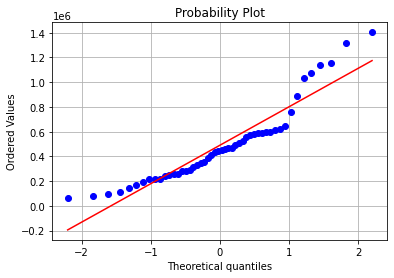

In [87]:
sc.probplot(dataset['Annual_HH_Income'], dist="norm", plot=plt)

plt.grid()

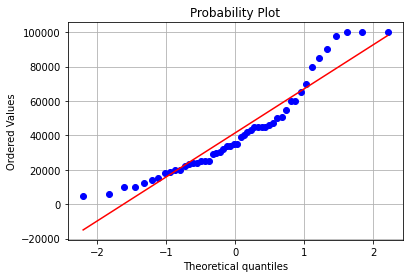

In [88]:
sc.probplot(dataset['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

The Q-Q plot, justifies that the Annual income is roughly a normal distribution or the scatter plot values are closer to the line than for other columns

# Boxcox transformation

To transform distributions like log normal or pareto distribution into normal distribution, we use boxcox transformation. For example, taking the log value of the log normal distribution converts it into normal distribution.
<!-- ![Alt Text](image path) -->
![Alt Text](https://media.geeksforgeeks.org/wp-content/uploads/20200531214708/powerlaw..png)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 40.31831648,  42.79683339,  50.5170921 ,  50.5170921 ,
          54.28331821,  56.29587859,  57.55538753,  61.01339013,
          62.0761407 ,  63.10059552,  63.10059552,  65.04699726,
          66.33720359,  66.87370106,  66.87370106,  67.74745911

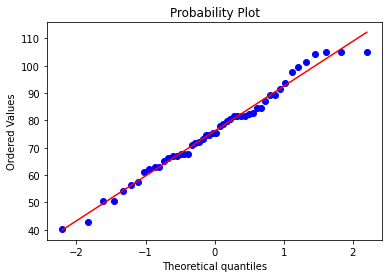

In [92]:
#Boxcox transformation of Montly income
graph , l = sc.boxcox(dataset['Mthly_HH_Income'])
sc.probplot(graph, dist="norm", plot=plt)

We have successfully converted the Montly income roughly to a Normal distribution with the help of Boxcox transformation.

In [101]:
dataset['Mthly_HH_Income'].skew()

0.9246148763777229

In [106]:
dataset['Mthly_HH_Income'].kurt()

0.11555007146606489

In [108]:
df = pd.DataFrame(graph, columns = ['Mthly_HH_Income'])

In [109]:
df['Mthly_HH_Income'].skew()

-0.02987968180187428

In [110]:
df['Mthly_HH_Income'].kurt()

-0.34009162904638757

As we can see, we have significantly improved on the skewness value after boxcox transformation